In [1]:
import os
import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

from dataset.dataloader import SHREC22_data
import augmentations.augmentations as aug
import utils.visualize as vis

In [2]:
path = './dataset/training_set/training_set/'
trainset = SHREC22_data(path, T = 90, normalize=False)
seq = trainset[0]['Sequence']

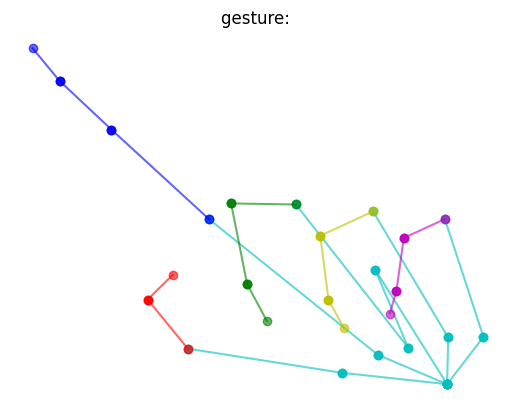

In [4]:
fig, ax = plt.subplots()
animation = vis.FuncAnimation(fig, vis.draw_skeleton_data, frames=90, fargs=(seq, vis.skeleton_connections, 1), interval=100)
animation_file_path = "./anim.gif"
animation.save(animation_file_path, writer='pillow', fps=10)

**Rotation**

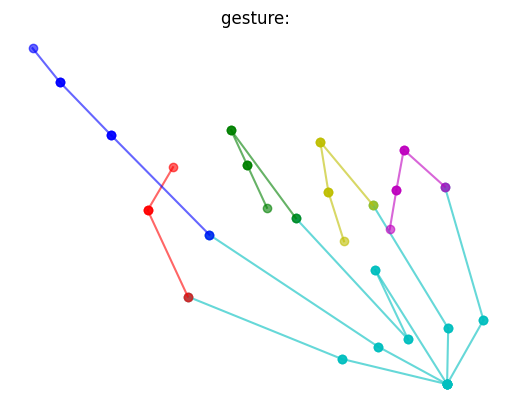

In [4]:
rotate = aug.Rotate(angle=[30,30])
r_seq = rotate(seq.unsqueeze(0))
r_seq = r_seq.squeeze()

fig, ax = plt.subplots()
animation = vis.FuncAnimation(fig, vis.draw_skeleton_data, frames=90, fargs=(r_seq, vis.skeleton_connections, 1), interval=100)
animation_file_path = "./anim_rotate30.gif"
animation.save(animation_file_path, writer='pillow', fps=10)

**Shear**

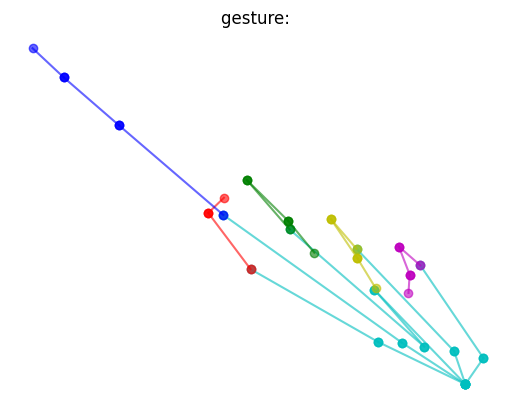

In [3]:
shear = aug.Shear()
shear_seq = shear(seq.unsqueeze(0))
shear_seq = shear_seq.squeeze()

fig, ax = plt.subplots()
animation = vis.FuncAnimation(fig, vis.draw_skeleton_data, frames=90, fargs=(shear_seq, vis.skeleton_connections, 1), interval=100)
animation_file_path = "./anim_shear.gif"
animation.save(animation_file_path, writer='pillow', fps=10)

**Horizontal Flip**

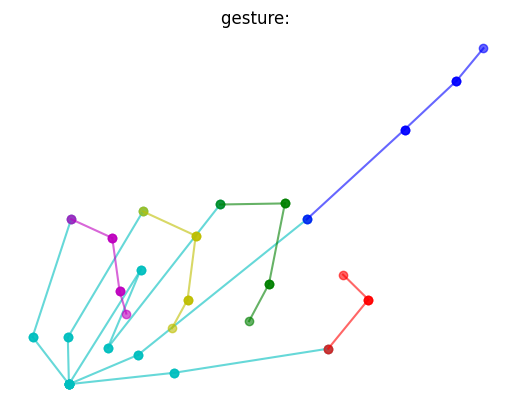

In [7]:
horizontal_flip = aug.RandomHorizontalFlip(p=0.9)
flip_seq = horizontal_flip(seq.unsqueeze(0))
flip_seq = flip_seq.squeeze()

fig, ax = plt.subplots()
animation = vis.FuncAnimation(fig, vis.draw_skeleton_data, frames=90, fargs=(flip_seq, vis.skeleton_connections, 1), interval=100)
animation_file_path = "./anim_hflip.gif"
animation.save(animation_file_path, writer='pillow', fps=10)

**Add Gaussian Noise**

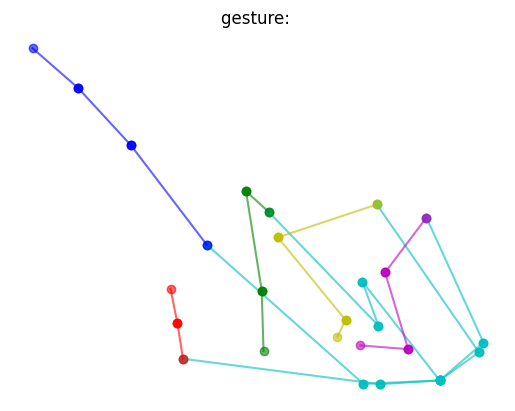

In [5]:
gauss_noise = aug.GaussianNoise(std=0.005)
gauss_noise_seq = gauss_noise(seq.unsqueeze(0))
gauss_noise_seq = gauss_noise_seq.squeeze()

fig, ax = plt.subplots()
animation = vis.FuncAnimation(fig, vis.draw_skeleton_data, frames=90, fargs=(gauss_noise_seq, vis.skeleton_connections, 1), interval=100)
animation_file_path = "./anim_gauss_noise.gif"
animation.save(animation_file_path, writer='pillow', fps=10)

**Gaussian Blur**

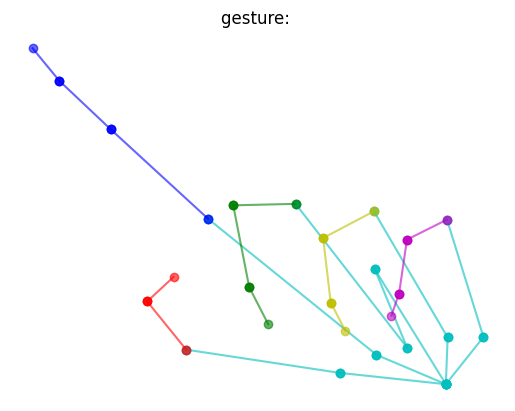

In [5]:
gauss_blur = aug.GaussianBlurConv(channels=3, kernel_length=15, sigma_range=[0.1, 2])
gauss_blur_seq = gauss_blur(seq.unsqueeze(0))
gauss_blur_seq = gauss_blur_seq.squeeze()

fig, ax = plt.subplots()
animation = vis.FuncAnimation(fig, vis.draw_skeleton_data, frames=90, fargs=(gauss_blur_seq, vis.skeleton_connections, 1), interval=100)
animation_file_path = "./anim_gauss_blur.gif"
animation.save(animation_file_path, writer='pillow', fps=10)